In [10]:
from monte_carlo_ising import MonteCarloData, MonteCarloExperiment
import numpy as np
import matplotlib.pyplot as plt

### Preparing an experiment: [EXAMPLE]
* Set thermalisation & measurement steps for 8x8 & 16x16
* Set temperatures
<br>
Then write to file, if not already done

In [23]:
thermalization_steps = dict()
measurement_steps = dict()

thermalization_steps[8] = 1_000_000
measurement_steps[8]    = 1_000_000

thermalization_steps[16] = 500_000
measurement_steps[16]    = 500_000

temperatures            = np.arange(0.1, 4, 0.1)

exp = MonteCarloExperiment.new_from_parameters("experiment_1", "example_folder", thermalization_steps, measurement_steps, temperatures)

if not exp.are_parameter_files_available():
    exp.write_parameter_files()

>> Directory "example_folder/experiment_1" created
>> Setting file paths:
-- setting paramfile "example_folder/experiment_1/parameter_8x8.txt"
-- setting paramfile "example_folder/experiment_1/parameter_16x16.txt"
-- setting outfile "example_folder/experiment_1/out_8x8.txt"
-- setting outfile "example_folder/experiment_1/out_16x16.txt"
>> Monte Carlo parameters set!
>> Temperatures set!
>> Looking for parameter files:
* Not all parameter files created yet:
-- not written yet: "example_folder/experiment_1/parameter_8x8.txt"
-- not written yet: "example_folder/experiment_1/parameter_16x16.txt"
>> writing parameter files:
-- example_folder/experiment_1/parameter_8x8.txt: done
-- example_folder/experiment_1/parameter_16x16.txt: done


## Loading a result from file: [EXAMPLE]

>> Directory "example_folder/experiment_2" Found.
>> Setting file paths:
-- setting paramfile "example_folder/experiment_2/parameter_8x8.txt"
-- setting paramfile "example_folder/experiment_2/parameter_16x16.txt"
-- setting paramfile "example_folder/experiment_2/parameter_32x32.txt"
-- setting paramfile "example_folder/experiment_2/parameter_64x64.txt"
-- setting outfile "example_folder/experiment_2/out_8x8.txt"
-- setting outfile "example_folder/experiment_2/out_16x16.txt"
-- setting outfile "example_folder/experiment_2/out_32x32.txt"
-- setting outfile "example_folder/experiment_2/out_64x64.txt"
>> Looking for output files:
-- Found output: "example_folder/experiment_2/out_8x8.txt"
-- Found output: "example_folder/experiment_2/out_16x16.txt"
-- Found output: "example_folder/experiment_2/out_32x32.txt"
-- Found output: "example_folder/experiment_2/out_64x64.txt"

Found output: "example_folder/experiment_2/out_8x8.txt
Found output: "example_folder/experiment_2/out_16x16.txt
Found outpu

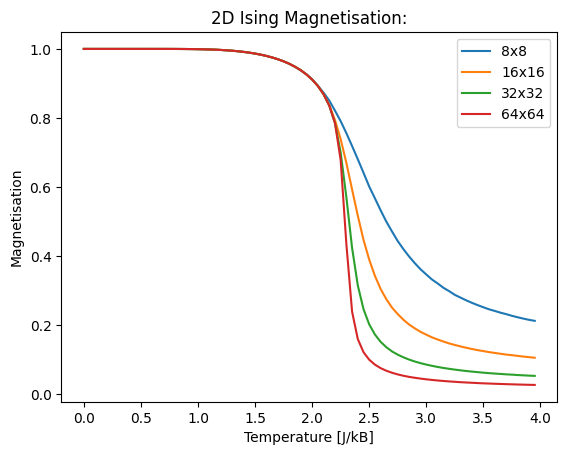

In [24]:
lengths      = [8, 16, 32, 64]
load_example = MonteCarloExperiment("experiment_2", "example_folder", lengths)

if load_example.are_results_available():
    result: dict[int,MonteCarloData]      = load_example.get_results()
    
    plt.title("2D Ising Magnetisation:")
    for (L, res) in result.items():
        plt.plot(res.temperatures, res.magnetisation, label=f"{L}x{L}")
        plt.xlabel("Temperature [J/kB]")
        plt.ylabel("Magnetisation")
        plt.legend()
else:
    print("No results available")

In [8]:
result = load_example.get_results()


Found output: "results/test/out_32x32.txt


In [10]:
load_example.temperatures